In [1]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
from os.path import join
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact,interact_manual,IntSlider,FloatSlider

In [8]:
%run ../customTypes
%run ../thermocouple
%run ../pfeiffer
%run ../ionizationGauge

In [15]:
desk = join(os.path.expanduser("~"),"Desktop", "Data")
drop = join(os.path.expanduser("~"),"Dropbox", "workspace","data")
drop = join(os.path.expanduser("~"),"Dropbox", "Experiments","2019-Ito-kun","Data")
#drop = join(os.path.expanduser('~'), "Dropbox", "Data")

In [16]:
dr = drop
temp_dir = os.path.join(dr, "Temperature")
pres1_dir = os.path.join(dr, "Pressure1")
pres2_dir = os.path.join(dr, "Pressure2")
qms_dir = os.path.join(dr, "Qms")

In [17]:
%run notebooktools.py

In [19]:
lst = [i for i in sorted(os.listdir(temp_dir)) if i.startswith('out')]
sz = np.array([os.path.getsize(join(temp_dir,i)) for i in lst])
ind = list(np.where(sz>150)[0])
lst = [lst[i] for i in ind]

lsq = [i for i in sorted(os.listdir(qms_dir)) if i.endswith('csv')]

In [21]:
fname = lst[21]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

'out_20191227202138.csv'

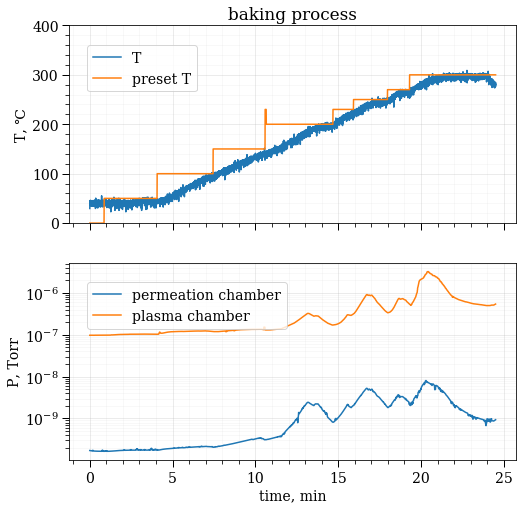

In [23]:
%run notebooktools.py

font_setup(size=14)
fig = gcf()
fig.set_size_inches((8,8))
""" temperature """
mask = np.where(t_data[:,0] <= 1470)
t_d = t_data[mask]
t_d = maskTemp(t_d)

""" pressure1 """
mask = np.where(p1_data[:,0] <= 1470)
p1_d = p1_data[mask]
p1_d = maskIonPres(p1_d)
p1_d[:, 1] = np.where(p1_d[:, 0] >= 755, p1_d[:, 1]*1e-6, p1_d[:, 1]*1e-7)
# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]

""" pressure2 """
mask = np.where(p2_data[:,0] <= 1470)
p2_d = p2_data[mask]
p2_d = maskPfePres(p2_d)
mask = np.where((abs(np.gradient(p2_d[:, 1])) < 5e-9) & (p2_d[:, 1] < 1e-5) & ((p2_d[:, 0] < 800) & (p2_d[:, 1] < 1e-6) | (p2_d[:, 0] >= 800)))
p2_d = p2_d[mask]

plt.subplot(2, 1, 1)
plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0, 400])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(0.04, 0.9), loc='upper left', borderaxespad=0, fontsize=14)
plt.title('baking process')

plt.subplot(2, 1, 2)
p1_d[:, 1] = savitzky_golay(p1_d[:, 1], 20, 1)
plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='permeation chamber')

p2_d[:, 1] = savitzky_golay(p2_d[:, 1], 20, 1)
plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='plasma chamber')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('P, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(0.04, 0.9), loc='upper left', borderaxespad=0, fontsize=14)

plt.savefig(join(drop, 'images/Temperature/baking.png'), bbox_inches = "tight")

In [26]:
fname = lst[27]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)


""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

fname

'out_20200110_115734.csv'

(60978, 3)
(60978, 3)


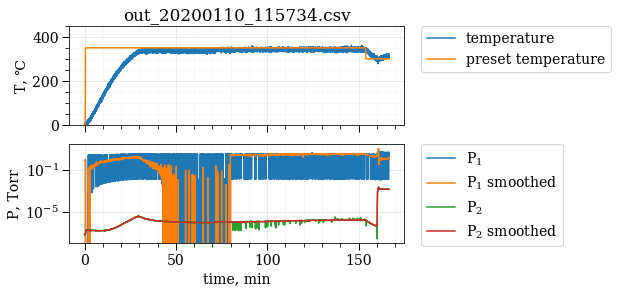

In [38]:
%run notebooktools.py
font_setup(size=14)

fr = 0
to = 10000

""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_d = t_data[mask]
t_d = maskTemp(t_d)
# t_data[:, 1] += 20.9

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_d = p1_data[mask]
# p1_data = maskIonPres(p1_data)
print(p1_d.shape)
# p1_data[:, 1] = np.where(p1_data[:, 0] >= 2465, p1_data[:, 1]*1e-7, p1_data[:, 1]*1e-7) # TODO: log scale の計算

# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]
print(p1_d.shape)

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_d = p2_data[mask]
p2_d = maskPfePres(p2_d)

plt.subplot(2, 1, 1)
plt.plot(t_d[:, 0]/60, t_d[:, 1], label='temperature')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset temperature')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0,450])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title(fname)

plt.subplot(2, 1, 2)
plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='$P_1$')
p1_d[:, 1] = savitzky_golay(p1_d[:, 1], 20, 1)
plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='$P_1$ smoothed')

plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='$P_2$')
p2_d[:, 1] = savitzky_golay(p2_d[:, 1], 20, 1)
plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='$P_2$ smoothed')

ticks_visual(gca())
grid_visual(gca())

plt.xlabel('time, min')
plt.ylabel('P, Torr')
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

23
out_20191227202138.csv
(27731, 3)


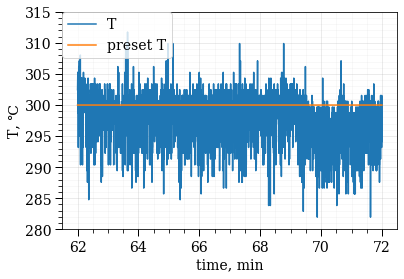

In [39]:
fr = 3720
to = 4320
# fig = gcf()
# fig.set_size_inches((8,8))

print(len(fname))
fname = lst[21]
print(fname)
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)
t_d = maskTemp(t_data)
print(t_d.shape)

mask = np.where((t_d[:,0] <= to) & (t_d[:, 0] >= fr))
t_d = t_d[mask]

plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')

ticks_visual(gca())
grid_visual(gca())
plt.ylabel('T, ℃')
plt.xlabel('time, min')
plt.ylim([280,315])
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.savefig(join("./temp_16ad.png"), bbox_inches = "tight")

## plasma plot


In [42]:
fname = lst[28]
print(fname)
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

""" qms """
start_time = fname[4:19]
start_time = datetime.strptime(start_time, "%Y%m%d_%H%M%S")
q_name = lsq[1]
q_data = pd.read_csv(join(qms_dir, q_name), header=36, encoding='utf-8')

q_name = q_name[3:16]
print(q_name)
base_time = datetime.strptime(q_name, "%y%m%d_%H%M%S")
d_time = (base_time - start_time).total_seconds()
d_time += 610
# columns = q_data.columns
q_data = np.array(q_data)


out_20200110_211410.csv
200110_212512


In [43]:
""" calculate time """
def calc_time(time: str):
    hour, minute, second = time.split(':')
    tmp = int(hour)*60*60 + int(minute)*60 + float(second)
    return tmp + d_time

In [44]:
q_data[:, 1] = [calc_time(i) for i in q_data[:, 1]]
d_time

1272.0

In [46]:
# vgclose = datetime.strptime("2020-01-10 21:22:10", "%Y-%m-%d %H:%M:%S")
argon_in = datetime.strptime("2020-01-10 21:35:14", "%Y-%m-%d %H:%M:%S")
filament_on = datetime.strptime("2020-01-10 21:35:43", "%Y-%m-%d %H:%M:%S")
plasma_1on = datetime.strptime("2020-01-10 21:35:53", "%Y-%m-%d %H:%M:%S")
d2_in = datetime.strptime("2020-01-10 21:26:58", "%Y-%m-%d %H:%M:%S")
d2_out = datetime.strptime("2020-01-10 21:31:40", "%Y-%m-%d %H:%M:%S")
argon_out = datetime.strptime("2020-01-10 21:43:18", "%Y-%m-%d %H:%M:%S")
plasma_off = datetime.strptime("2020-01-10 21:43:20", "%Y-%m-%d %H:%M:%S")

1200
1750.0
(3653, 3)
(3653, 3)
(25215, 3)
(3659, 3)


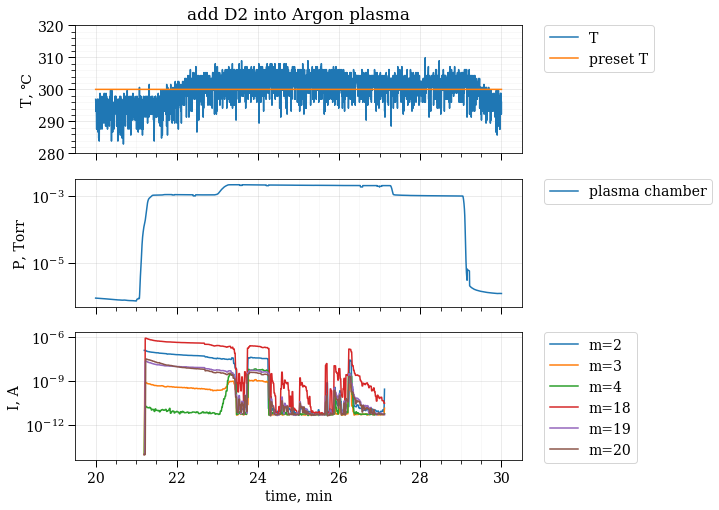

In [47]:
%run notebooktools.py
font_setup(size=14)

fig = gcf()
fig.set_size_inches((8,8))

fr = argon_in - start_time
fr = fr.total_seconds() -20
# fr = 750
# fr = 600
fr = 1200
print(fr)
to = plasma_off - start_time
to = to.total_seconds()
print(to)
# to = 800
to = 1800

""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_d = t_data[mask]
t_d = maskTemp(t_d)

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_d = p1_data[mask]
# p1_d = p1_data
print(p1_d.shape)
# p1_d = maskIonPres(p1_d)

# mask = np.where(((p1_d[:, 0]>=600) & (p1_d[:, 0] <= 800) & (p1_d[:, 1] > 1)) | (p1_d[:, 0] < 600) | (p1_d[:, 0] > 800))
# p1_d = p1_d[mask]

p1_d[:, 1] *= 1e-7
# p1_data[:, 1] = np.where(p1_data[:, 0] >= 2465, p1_data[:, 1]*1e-7, p1_data[:, 1]*1e-7)

# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]
print(p1_d.shape)

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_d = p2_data[mask]
print(p2_data.shape)

mask = np.where(((p2_d[:,0] <= 430) & (p2_d[:, 1] < 3)) | (p2_d[:, 0] > 430))
p2_d = p2_d[mask]

mask = np.where(((p2_d[:, 0]>=1080)&(p2_d[:,0] <= 1200) & (p2_d[:, 1] < 4)) | (p2_d[:, 0] < 1080) | (p2_d[:, 0] > 1200))
p2_d = p2_d[mask]


mask = np.where(((p2_d[:, 0]>=1800) & (p2_d[:, 1] < 4)) | (p2_d[:, 0] < 1800))
p2_d = p2_d[mask]

p2_d = maskPfePres(p2_d)
print(p2_d.shape)

""" qms """
mask = np.where((q_data[:,1] <= to) & (q_data[:, 1] >= fr))
q_d = q_data[mask]

ax = plt.subplot(3, 1, 1)
plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([280,320])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title('add D2 into Argon plasma')

plt.subplot(3, 1, 2, sharex=ax)
# p1_d[:, 1] = savitzky_golay(p1_d[:, 1], 20, 1)
# plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='permeation chamber')

p2_d[:, 1] = savitzky_golay(p2_d[:, 1], 20, 1)
plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='plasma chamber')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylabel('P, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
# plt.axvspan(((vgclose-start_time).total_seconds()-10)/60, ((vgclose-start_time).total_seconds())/60, color="red", alpha=0.3)
# plt.axvspan(((argon_in-start_time).total_seconds()-10)/60, (argon_in-start_time).total_seconds()/60, color="red", alpha=0.3)
# plt.axvspan(((plasma_1on-start_time).total_seconds()-10)/60, (plasma_off-start_time).total_seconds()/60, color="red", alpha=0.3)

# plt.axvspan(((d2_in-start_time).total_seconds()-10)/60, (d2_out-start_time).total_seconds()/60, color="gray", alpha=0.3)

plt.subplot(3, 1, 3, sharex=ax)
mass = [2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 28, 32, 40, 44]
for i in range(len(mass)):
    if mass[i] in [2, 3, 4, 18, 19, 20]:
        plt.plot(q_d[:, 1]/60, q_d[:, 5+i], label='m={}'.format(mass[i]))
# gca().axvline(24)

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('I, A') 
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)

# gca().axvline((d2_in-start_time).total_seconds()/60)
# gca().axvline((d2_out-start_time).total_seconds()/60)

plt.savefig(join("./temp_16ad.png"), bbox_inches = "tight")

# 20191227

In [51]:
fname = lst[21]
print(lst[21])
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)

""" qms """
# start_time = fname[4:19]
start_time = fname[4:18]
# start_time = datetime.strptime(start_time, "%Y%m%d_%H%M%S")
start_time = datetime.strptime(start_time, "%Y%m%d%H%M%S")
q_name = lsq[0]
print(q_name)
q_data = pd.read_csv(join(qms_dir, q_name), header=36, encoding='utf-8')

q_name = q_name[3:16]

base_time = datetime.strptime(q_name, "%y%m%d_%H%M%S")
print(base_time, start_time)
d_time = (base_time - start_time).total_seconds()
d_time
# print(p1_data[:-1, 0])
# print(p2_data[:-1, 0])
# columns = q_data.columns
q_data = np.array(q_data)

out_20191227202138.csv
S1_191227_2017242.csv
2019-12-27 20:17:24 2019-12-27 20:21:38


In [52]:
q_data[:, 1] = [calc_time(i) for i in q_data[:, 1]]
d_time

-254.0

0
1214502.0
(28680, 3)
(28740, 3)
(28643, 3)
27.816666666666666


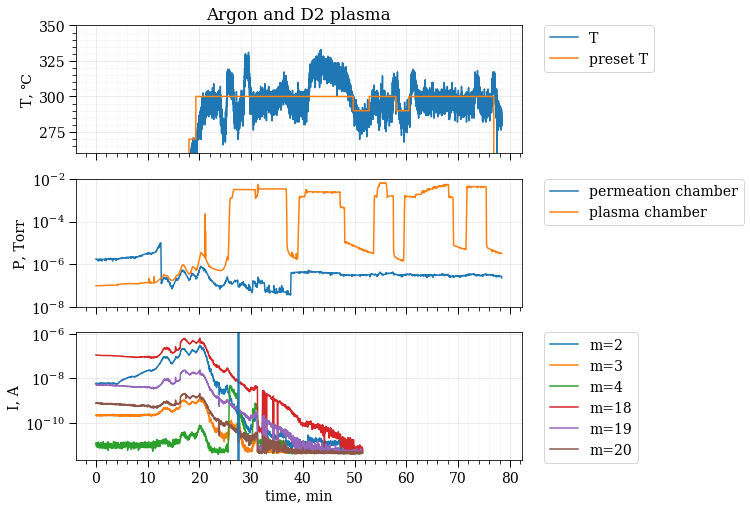

In [53]:
%run notebooktools.py
font_setup(size=14)
fig = gcf()
fig.set_size_inches((8,8))
fr = argon_in - start_time
fr = fr.total_seconds() -20
# fr = 1640
fr = 0
print(fr)
to = plasma_off - start_time
to = to.total_seconds()
print(to)
# to = 1700
to = 10000000

""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_d = t_data[mask]
t_d = maskTemp(t_d)

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_d = p1_data[mask]

p1_d[:, 1] = np.where(p1_d[:, 0] >= 755, p1_d[:, 1]*1e-7, p1_d[:, 1]*1e-6)

print(p1_d.shape)
# p1_d = maskIonPres(p1_d)

# mask = np.where(((p1_d[:, 0]>=600) & (p1_d[:, 0] <= 800) & (p1_d[:, 1] > 1)) | (p1_d[:, 0] < 600) | (p1_d[:, 0] > 800))
# p1_d = p1_d[mask]


# mask = np.where(abs(np.gradient(p1_data[:, 1])) < 1e-8)
# p1_data = p1_data[mask]

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_d = p2_data[mask]
print(p2_data.shape)

# mask = np.where(((p2_d[:,0] <= 430) & (p2_d[:, 1] < 3)) | (p2_d[:, 0] > 430))
# p2_d = p2_d[mask]

# mask = np.where(((p2_d[:, 0]>=1080)&(p2_d[:,0] <= 1200) & (p2_d[:, 1] < 4)) | (p2_d[:, 0] < 1080) | (p2_d[:, 0] > 1200))
# p2_d = p2_d[mask]


# mask = np.where(((p2_d[:, 0]>=1800) & (p2_d[:, 1] < 4)) | (p2_d[:, 0] < 1800))
# p2_d = p2_d[mask]
p2_d = maskPfePres(p2_d)
print(p2_d.shape)

""" qms """
mask = np.where((q_data[:,1] <= to) & (q_data[:, 1] >= fr))
q_d = q_data[mask]

ax1 = plt.subplot(3, 1, 1)
plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([260,350])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.title('Argon and D2 plasma')

plt.subplot(3, 1, 2, sharex = ax1)
p1_d[:, 1] = savitzky_golay(p1_d[:, 1], 20, 1)
plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='permeation chamber')

p2_d[:, 1] = savitzky_golay(p2_d[:, 1], 20, 1)
plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='plasma chamber')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([1e-8, 1e-2])
plt.ylabel('P, Torr') 
plt.yscale("log")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
# plt.axvspan(((vgclose-start_time).total_seconds()-10)/60, ((vgclose-start_time).total_seconds())/60, color="red", alpha=0.3)
# plt.axvspan(((argon_in-start_time).total_seconds()-10)/60, (argon_in-start_time).total_seconds()/60, color="red", alpha=0.3)
# plt.axvspan(((plasma_1on-start_time).total_seconds()-10)/60, (plasma_off-start_time).total_seconds()/60, color="red", alpha=0.3)

# plt.axvspan(((d2_in-start_time).total_seconds()-10)/60, (d2_out-start_time).total_seconds()/60, color="gray", alpha=0.3)

plt.subplot(3, 1, 3, sharex=ax1)
mass = [2, 3, 4, 14, 15, 16, 17, 18, 19, 20, 28, 32, 40, 44]
for i in range(len(mass)):
    if mass[i] in [2, 3, 4, 18, 19, 20]:
        plt.plot(q_d[:, 1]/60, q_d[:, 5+i], label='m={}'.format(mass[i]))
gca().axvline(1644/60)
gca().axvline(1664/60)
print(1669/60)

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('I, A') 
plt.yscale("log")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.savefig(join("./temp_16ad.png"), bbox_inches = "tight")

## 20200122

In [55]:
fname = lst[93]
""" temperature """
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

""" pressure1 """
p1_data = pd.read_csv(join(pres1_dir, fname))
p1_data = np.array(p1_data)

""" pressure2 """
p2_data = pd.read_csv(join(pres2_dir, fname))
p2_data = np.array(p2_data)
fname, t_data.shape, p1_data.shape, p2_data.shape

('out_20200119_233844.csv', (1855, 3), (14370, 3), (14300, 3))

489.916204


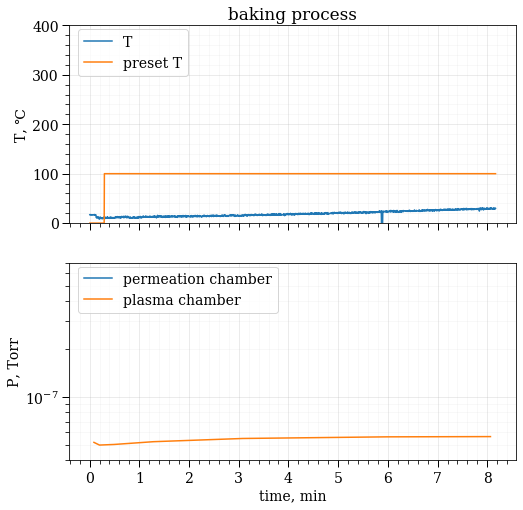

In [59]:
%run notebooktools.py

font_setup(size=14)
fig = gcf()
fig.set_size_inches((8,8))
print(t_data[-1, 0])
fr = 0
to = 5100
""" temperature """
mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_d = t_data[mask]

""" pressure1 """
mask = np.where((p1_data[:,0] <= to) & (p1_data[:, 0] >= fr))
p1_d = p1_data[mask]
mask = np.where(((p1_d[:,0] <= 1942) & (p1_d[:, 1] < 1)) | (p1_d[:, 0] > 1942))
p1_d = p1_d[mask]
mask = np.where(((p1_d[:,0] > 2300) & (p1_d[:, 0] < 2800) & (p1_d[:, 1] < 2.5)) | (p1_d[:, 0] <= 2300) |(p1_d[:, 0] >= 2800) )
p1_d = p1_d[mask]
mask = np.where(((p1_d[:,0] >= 3500) & (p1_d[:, 1] < 1.3)) | (p1_d[:, 0] < 3500))
p1_d = p1_d[mask]
p1_d[:, 1] = np.where(p1_d[:, 0] >= 755, p1_d[:, 1]*1e-7, p1_d[:, 1]*1e-7)

""" pressure2 """
mask = np.where((p2_data[:,0] <= to) & (p2_data[:, 0] >= fr))
p2_d = p2_data[mask]
mask = np.where(p2_d[:, 1] < 3.3)
p2_d = p2_d[mask]
p2_d = maskPfePres(p2_d)

ax = plt.subplot(2, 1, 1)
plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')
plt.tick_params(labelbottom=False)
ticks_visual(gca())
grid_visual(gca())
plt.ylim([0, 400])
plt.ylabel('T, ℃')
plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0, fontsize=14)
plt.title('baking process')

plt.subplot(2, 1, 2, sharex=ax)
p1_d[:, 1] = savitzky_golay(p1_d[:, 1], 30, 1)
plt.plot(p1_d[:, 0]/60, p1_d[:, 1], label='permeation chamber')

p2_d[:, 1] = savitzky_golay(p2_d[:, 1], 3, 1)
plt.plot(p2_d[:, 0]/60, p2_d[:, 1], label='plasma chamber')

ticks_visual(gca())
grid_visual(gca())
plt.xlabel('time, min')
plt.ylabel('P, Torr') 
plt.ylim([4e-8, 7e-7])
plt.yscale("log")

plt.legend(bbox_to_anchor=(0.02, 0.98), loc='upper left', borderaxespad=0, fontsize=14)

plt.savefig(join(drop, 'images/Temperature/baking.png'), bbox_inches = "tight")

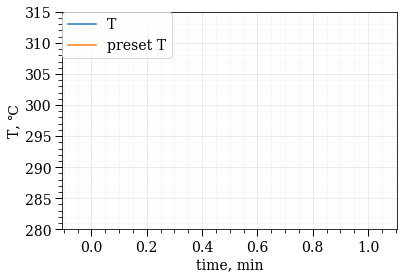

In [60]:
fr = 3720
to = 4320
fname = lst[93]
t_data = pd.read_csv(join(temp_dir, fname))
t_data = np.array(t_data)

mask = np.where((t_data[:,0] <= to) & (t_data[:, 0] >= fr))
t_d = t_data[mask]

plt.plot(t_d[:, 0]/60, t_d[:, 1], label='T')
plt.plot(t_d[:, 0]/60, t_d[:, 2], label='preset T')

ticks_visual(gca())
grid_visual(gca())
plt.ylabel('T, ℃')
plt.xlabel('time, min')
plt.ylim([280,315])
plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize=14)
plt.savefig(join("./temp_MAX6675.png"), bbox_inches = "tight")